# Cohort analysis: Customer purchase behaviour

In this exercise a time based cohort analysis has been performed to see the customers purchase activity. Customers are grouped into cohort, based on their month of their first purchase and then calculte the number of month since the first purchase. Retention are then calculated and plotted on a heatmap.

### Table content
* Exporatory data analysis (EDA)
* Data cleaning and manipulation 
* Cohort analysis
* Conslusion

In [1]:
import pandas as pd 
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt #import datetime as dt
import seaborn as sns


df = pd.read_excel('Online Retail.xlsx')



C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def get_month(x):
    """
    Input parameter: Date from the InvoiceDate column
    Output parameter: Truncates a given Incoive date to first day of the month
    """
   
    return dt(x.year, x.month, 1)

def get_date_int(df,column):
    """
    Input paramter: dataframe(df) and date column(column)
    Output: Get the date parts that is year, month and day
    """
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    
    return year, month, day


def size_cohort(dic,date):
    """
    Input paramter: 1st paramter: A dictionary where the keys are the dates and the values are the cohort size
                    2nd paramter: The date that will be used as a key in the dictionary
    Output paramter: The cohort size of a specific date
    """
  
    return dic.get(date)


# Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df[ df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [7]:
# Descriptive statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


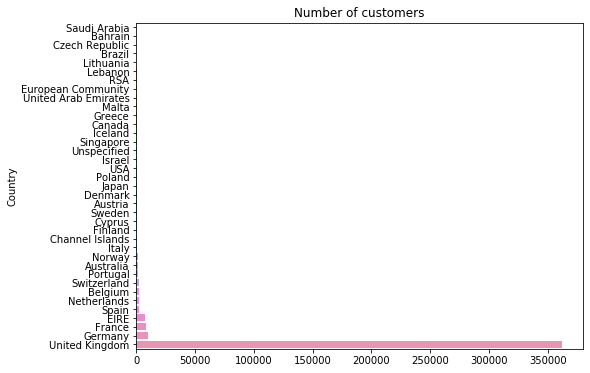

In [8]:
purchase_country = df.groupby('Country')['CustomerID'].count().sort_values()
plt.figure(figsize=(8,6))
sns.barplot(x=purchase_country.values,y=purchase_country.index)
plt.title('Number of customers')
plt.show()

Text(0, 0.5, 'CustomerID and Country')

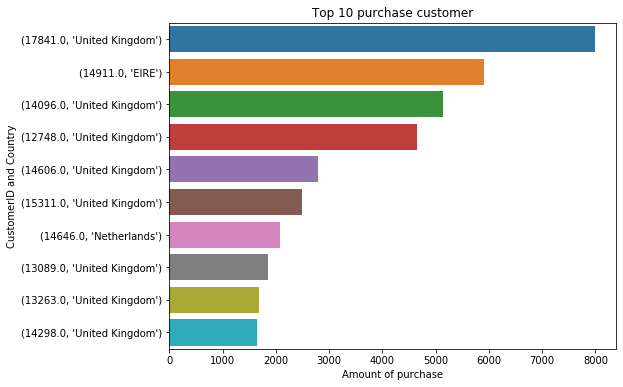

In [9]:
purchase_customer = df.groupby(['CustomerID','Country'])['InvoiceNo'].count().sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
sns.barplot(x=purchase_customer.values, y=purchase_customer.index)
plt.title('Top 10 purchase customer')
plt.xlabel('Amount of purchase')
plt.ylabel('CustomerID and Country')

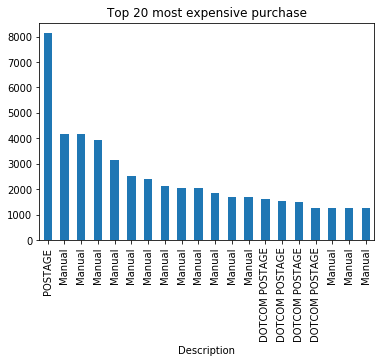

In [10]:
df_item_price = df[df['Quantity'] >0].sort_values(ascending=False, by='UnitPrice')
df_item_price.set_index('Description')['UnitPrice'][:20].plot.bar()
plt.title('Top 20 most expensive purchase')
plt.show()


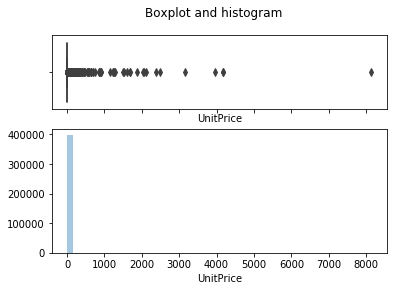

In [82]:
# Add boxplot and histogram
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, 0.5)})

sns.boxplot(df_item_price['UnitPrice'], ax=ax_box)
sns.distplot(df_item_price['UnitPrice'], ax=ax_hist,kde=False)
plt.suptitle('Boxplot and histogram')
plt.show()

The UnitPrice range is very wide with many outliers which cause the histogram to be scewed. 

# Data manipulation

In [84]:
# Create two data frames, one for purchase and one for refund
# We will only use purchase

df_purchase =  df[df['Quantity'] > 0].copy()
df_refund = df[df['Quantity'] < 0].copy()


In [85]:
# Convert object to date
df_purchase['InvoiceDate'] = pd.to_datetime(df_purchase['InvoiceDate']).dt.date

In [86]:
# Get invoice month for every purchase

df_purchase['InvoiceMonth'] = df_purchase['InvoiceDate'].apply(get_month)
df_purchase.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,2011-12-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011-12-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011-12-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011-12-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,2011-12-01


In [87]:
# First purchase for respectively customer
df_purchase['StartingMonth'] = df_purchase.groupby('CustomerID')['InvoiceMonth'].transform('min')
df_purchase['StartingMonth'] = pd.to_datetime(df_purchase['StartingMonth'])
df_purchase.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,StartingMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,2011-12-01,2011-08-01


In [88]:
# Get the date parts from the InvoiceMonth column
invoice_year, invoice_month, invoice_day = get_date_int(df_purchase,'InvoiceMonth')

# Get the date parts from the StartingtMonth column
cohort_year, cohort_month, cohort_day = get_date_int(df_purchase,'StartingMonth')

# Caclulate difference in year, month and day respectively
yrs_diff = invoice_year - cohort_year
mons_diff = invoice_month - cohort_month
days_diff = invoice_day - cohort_day

# Column for Number of month passed
df_purchase['MonthsPassed'] = yrs_diff * 12 + mons_diff
df_purchase.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,StartingMonth,MonthsPassed
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,2011-12-01,2011-08-01,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011-12-01,2011-08-01,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011-12-01,2011-08-01,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011-12-01,2011-08-01,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,2011-12-01,2011-08-01,4


In [104]:
#Count number of unique values in CustomerID
grouping = df_purchase.groupby(['StartingMonth','MonthsPassed'])
cohort_data = grouping['CustomerID'].nunique().reset_index() 
cohort_data

,StartingMonth,MonthsPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
86,2011-10-01,1,86
87,2011-10-01,2,41
88,2011-11-01,0,324
89,2011-11-01,1,36


In [105]:
# Create a dictionary of cohort size for each month,i.e. initial month, MonthsPassed = 0
cohort_sizes= cohort_data[cohort_data['MonthsPassed'] == 0].drop('MonthsPassed',axis=1).set_index('StartingMonth')
cohort_sizes.index=cohort_sizes.index.strftime('%Y-%m-%d')
dict_cohort_sizes = cohort_sizes['CustomerID'].to_dict()
dict_cohort_sizes

{'2010-12-01': 885,
 '2011-01-01': 417,
 '2011-02-01': 380,
 '2011-03-01': 452,
 '2011-04-01': 300,
 '2011-05-01': 284,
 '2011-06-01': 242,
 '2011-07-01': 188,
 '2011-08-01': 169,
 '2011-09-01': 299,
 '2011-10-01': 358,
 '2011-11-01': 324,
 '2011-12-01': 41}

In [91]:
# Number of customer for respectively StartingMonth row

# Convert the values in StartingMonth column for 
cohort_data['StartingMonth']= cohort_data['StartingMonth'].astype(str)

cohort_data['NumCustomer'] = cohort_data.apply(lambda x: 
                                               size_cohort(dict_cohort_sizes,x['StartingMonth']),
                                               axis=1)
cohort_data.tail()

,StartingMonth,MonthsPassed,CustomerID,NumCustomer
86,2011-10-01,1,86,358
87,2011-10-01,2,41,358
88,2011-11-01,0,324,324
89,2011-11-01,1,36,324
90,2011-12-01,0,41,41


# Cohort analysis 

In [94]:
# Create pivot table
cohort_counts = cohort_data.pivot(index=['StartingMonth','NumCustomer'],
                                  columns='MonthsPassed',
                                  values='CustomerID')


# Calculate the percentage retension
retention = cohort_counts.divide(cohort_sizes.values,axis=0)
retention = retention.round(3)*100

retention.style.background_gradient(cmap="Greens", vmax=50,vmin=0)

,MonthsPassed,0,1,2,3,4,5,6,7,8,9,10,11,12
StartingMonth,NumCustomer,,,,,,,,,,,,,
2010-12-01,885,100.000000,36.600000,32.300000,38.400000,36.300000,39.800000,36.300000,34.900000,35.400000,39.500000,37.400000,50.300000,26.600000
2011-01-01,417,100.000000,22.100000,26.600000,23.000000,32.100000,28.800000,24.700000,24.200000,30.000000,32.600000,36.500000,11.800000,nan
2011-02-01,380,100.000000,18.700000,18.700000,28.400000,27.100000,24.700000,25.300000,27.900000,24.700000,30.500000,6.800000,nan,nan
2011-03-01,452,100.000000,15.000000,25.200000,19.900000,22.300000,16.800000,26.800000,23.000000,27.900000,8.600000,nan,nan,nan
2011-04-01,300,100.000000,21.300000,20.300000,21.000000,19.700000,22.700000,21.700000,26.000000,7.300000,nan,nan,nan,nan
2011-05-01,284,100.000000,19.000000,17.300000,17.300000,20.800000,23.200000,26.400000,9.500000,nan,nan,nan,nan,nan
2011-06-01,242,100.000000,17.400000,15.700000,26.400000,23.100000,33.500000,9.500000,nan,nan,nan,nan,nan,nan
2011-07-01,188,100.000000,18.100000,20.700000,22.300000,27.100000,11.200000,nan,nan,nan,nan,nan,nan,nan
2011-08-01,169,100.000000,20.700000,24.900000,24.300000,12.400000,nan,nan,nan,nan,nan,nan,nan,nan


In [98]:
df_purchase_uk = df_purchase[df_purchase['Country'] == 'United Kingdom'].copy()
df_purchase_uk['StartingMonth'] = df_purchase_uk.groupby('CustomerID')['InvoiceMonth'].transform('min')
df_purchase_uk['StartingMonth'] = pd.to_datetime(df_purchase_uk['StartingMonth'])

# Get the date parts from the InvoiceMonth column
invoice_year, invoice_month, invoice_day = get_date_int(df_purchase_uk,'InvoiceMonth')

# Get the date parts from the StartingtMonth column
cohort_year, cohort_month, cohort_day = get_date_int(df_purchase_uk,'StartingMonth')

# Caclulate difference in year, month and day respectively
yrs_diff = invoice_year - cohort_year
mons_diff = invoice_month - cohort_month
days_diff = invoice_day - cohort_day

# Column for Number of month passed
df_purchase_uk['MonthsPassed'] = yrs_diff * 12 + mons_diff

#Count number of unique values in CustomerID
grouping = df_purchase_uk.groupby(['StartingMonth','MonthsPassed'])
cohort_data = grouping['CustomerID'].nunique().reset_index() 


# Create a dictionary of cohort size for each month,i.e. initial month, MonthsPassed = 0
cohort_sizes= cohort_data[cohort_data['MonthsPassed'] == 0].drop('MonthsPassed',axis=1).set_index('StartingMonth')
cohort_sizes.index=cohort_sizes.index.strftime('%Y-%m-%d')
dict_cohort_sizes = cohort_sizes['CustomerID'].to_dict()

cohort_data['StartingMonth']= cohort_data['StartingMonth'].astype(str)
cohort_data['NumCustomer'] = cohort_data.apply(lambda x: 
                                               size_cohort(dict_cohort_sizes,x['StartingMonth']),
                                               axis=1)

cohort_counts = cohort_data.pivot(index=['StartingMonth','NumCustomer'],
                                  columns='MonthsPassed',
                                  values='CustomerID')


In [100]:
# Calculate the percentage retension for UK customer
retention = cohort_counts.divide(cohort_sizes.values,axis=0)
retention
retention=retention.round(3)*100

#cm = sns.light_palette("seagreen", as_cmap=True)
retention.style.background_gradient(cmap="Greens", vmax=50,vmin=0)

,MonthsPassed,0,1,2,3,4,5,6,7,8,9,10,11,12
StartingMonth,NumCustomer,,,,,,,,,,,,,
2010-12-01,815,100.000000,35.500000,32.300000,37.300000,36.000000,39.600000,35.700000,34.100000,35.500000,39.900000,36.700000,49.700000,26.700000
2011-01-01,358,100.000000,21.200000,26.000000,23.500000,33.200000,27.700000,25.100000,24.300000,30.200000,32.700000,35.500000,12.000000,nan
2011-02-01,340,100.000000,18.800000,19.400000,28.500000,28.800000,25.300000,25.600000,28.200000,26.500000,30.600000,7.400000,nan,nan
2011-03-01,419,100.000000,15.300000,26.000000,19.800000,22.400000,16.500000,26.500000,22.900000,28.400000,9.100000,nan,nan,nan
2011-04-01,277,100.000000,20.900000,20.200000,21.700000,20.200000,22.000000,22.000000,26.400000,7.200000,nan,nan,nan,nan
2011-05-01,256,100.000000,18.800000,17.200000,17.200000,20.700000,22.700000,26.600000,9.000000,nan,nan,nan,nan,nan
2011-06-01,214,100.000000,17.800000,14.500000,23.800000,23.800000,32.200000,9.800000,nan,nan,nan,nan,nan,nan
2011-07-01,169,100.000000,17.800000,19.500000,23.100000,27.800000,10.700000,nan,nan,nan,nan,nan,nan,nan
2011-08-01,141,100.000000,22.700000,22.700000,24.100000,12.100000,nan,nan,nan,nan,nan,nan,nan,nan


# Conclusion
Cohort analysis have been performed on international customer and UK customer. The trend is clear for both cohort analysis, that is the churn is more than 60% after first month of purchase. EDA shows that data for UK customers are dominating in the data set. That explains also the behaviour of the two cohort analysis. Since number of purchase is much smaller for the other countries, cohort analysis have not been performed. There is no additional data that can explain this high churn rate. However, customer who purchased during december month have less churn rate compared to the other groups. It seems like these customers were more satisfied compared to the other groups and the retension rate is fairly stable compared tothe other groups as well. 
